In [2]:

from plotly import __version__

from plotly.offline import init_notebook_mode, iplot

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools


import pandas as pd
import numpy as np

In [3]:
import scipy
import os 




from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score, roc_auc_score, accuracy_score 
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans

import random

from scipy.stats import ttest_ind




/Users/my_macbook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [4]:
PaymentRawData = "/Users/my_macbook/Projects/Project_Capstone/DataSet/2017Payment/OP_DTL_GNRL_PGYR2017_P06292018.csv"


PartDRawData = "/Users/my_macbook/Projects/Project_Capstone/DataSet/PartD_Drug_16/PartD_Drug_16.txt"

IELErawdata = "/Users/my_macbook/Projects/Project_Capstone/DataSet/2018UpdatedLEIE.csv"

OpioidsrawData = "/Users/my_macbook/Projects/Project_Capstone/DataSet/opioids_prescriber_info.csv"

GeoCrimeRawData = "/Users/my_macbook/Projects/Project_Capstone/DataSet/Crime_Rankings.csv"

In [78]:
opioids = pd.read_csv("/Users/my_macbook/Projects/Project_Capstone/DataSet/opioids.csv")

In [5]:
# Payment Data Pre-processing

payment_pd = pd.read_csv(PaymentRawData)

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (4,7,9,11,14,16,17,21,22,23,24,35,36,37,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
payment_pd.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,NaN,NaN,NaN,89784.0,GEORGE,NaN,AJJAN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/29/2018
1,NEW,Covered Recipient Physician,NaN,NaN,NaN,113198.0,ELISABETH,NaN,ANTON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/29/2018
2,NEW,Covered Recipient Physician,NaN,NaN,NaN,41654.0,CHRISTINE,NaN,ALBRECHT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/29/2018
3,NEW,Covered Recipient Physician,NaN,NaN,NaN,41654.0,CHRISTINE,NaN,ALBRECHT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/29/2018
4,NEW,Covered Recipient Physician,NaN,NaN,NaN,97632.0,IMAN,NaN,ALI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/29/2018


In [7]:
payment_fpd = payment_pd.loc[:,['Physician_First_Name',\
                                             'Physician_Last_Name', \
                                             'Recipient_City', \
                                             'Recipient_State', \
                                             'Total_Amount_of_Payment_USDollars']]

In [8]:
payment_fpd.head()

,Physician_First_Name,Physician_Last_Name,Recipient_City,Recipient_State,Total_Amount_of_Payment_USDollars
0,GEORGE,AJJAN,TEANECK,NJ,14.54
1,ELISABETH,ANTON,BELLEVUE,WA,15.30
2,CHRISTINE,ALBRECHT,HOUMA,LA,15.78
3,CHRISTINE,ALBRECHT,HOUMA,LA,16.30
4,IMAN,ALI,BEDFORD,TX,15.59


In [9]:
payment_fpd.count()



Physician_First_Name                 10890372
Physician_Last_Name                  10890202
Recipient_City                       10931829
Recipient_State                      10931490
Total_Amount_of_Payment_USDollars    10931832
dtype: int64

In [10]:
payment_fpd1 = payment_fpd.groupby(['Physician_First_Name','Physician_Last_Name','Recipient_City','Recipient_State'])\
                                   .agg({'Total_Amount_of_Payment_USDollars':['sum']}).astype(float)

In [11]:
level0 = payment_fpd1.columns.get_level_values(0)

In [12]:
level1 = payment_fpd1.columns.get_level_values(1)

In [13]:
payment_fpd1.columns = level0 + '_' + level1

In [14]:
payment_fpd1.reset_index()

,Physician_First_Name,Physician_Last_Name,Recipient_City,Recipient_State,Total_Amount_of_Payment_USDollars_sum
0,",BIRUTE",PUMPUTIS,VALPARAISO,IN,11.69
1,-RAFIK,GIRGIS,GLENDORA,CA,238.28
2,-cheryl,Chu,Los Angeles,CA,13.76
3,-rafik,Girgis,Glendora,CA,533.11
4,.ALEKSANDR,ITKIN,SAN DIEGO,CA,45.65
5,.JEFFREY,GAITZ,HOUSTON,TX,218.49
6,.NADINE,WALKER,LITHONIA,GA,92.80
7,.RANSFORD,COMMEY,PHILADELPHIA,PA,1584.74
8,.pamela,Knickerbocker,Redding,CA,14.64
9,01-SOHEIR,AZER,DOWNEY,CA,12.64


In [15]:
payment_fpd1.head()

,,,,Total_Amount_of_Payment_USDollars_sum
Physician_First_Name,Physician_Last_Name,Recipient_City,Recipient_State,
",BIRUTE",PUMPUTIS,VALPARAISO,IN,11.69
-RAFIK,GIRGIS,GLENDORA,CA,238.28
-cheryl,Chu,Los Angeles,CA,13.76
-rafik,Girgis,Glendora,CA,533.11
.ALEKSANDR,ITKIN,SAN DIEGO,CA,45.65


In [16]:
rename_dict = {'Physician_First_Name':'first_name', 'Physician_Last_Name':'last_name','Recipient_City':'city','Recipient_State':'state','Total_Amount_of_Payment_USDollars_sum':'Total_Payment_Sum'}
payment_fpd1 = payment_fpd1.rename(columns=rename_dict)

In [17]:
payment_fpd1.head()

,,,,Total_Payment_Sum
Physician_First_Name,Physician_Last_Name,Recipient_City,Recipient_State,
",BIRUTE",PUMPUTIS,VALPARAISO,IN,11.69
-RAFIK,GIRGIS,GLENDORA,CA,238.28
-cheryl,Chu,Los Angeles,CA,13.76
-rafik,Girgis,Glendora,CA,533.11
.ALEKSANDR,ITKIN,SAN DIEGO,CA,45.65


In [18]:
payment_fpd2= payment_fpd1.reset_index()

In [19]:
rename_dict = {'Physician_First_Name':'first_name', 'Physician_Last_Name':'last_name','Recipient_City':'city','Recipient_State':'state','Total_Amount_of_Payment_USDollars_sum':'Total_Payment_Sum'}
payment_fpd2 = payment_fpd2.rename(columns=rename_dict)

In [20]:
payment_fpd2 = payment_fpd2.sort_values('Total_Payment_Sum',ascending=False)

In [21]:
payment_fpd2.head()

,first_name,last_name,city,state,Total_Payment_Sum
400215,JAMES,GAMMIE,Baltimore,MD,26843529.80
942922,STEPHEN,BURKHART,SAN ANTONIO,TX,22969245.26
153562,CHARLES,GOODIS,ALBUQUERQUE,NM,22880446.67
550533,KEVIN,FOLEY,Memphis,TN,17038512.75
387720,IVAN,OSORIO,KANSAS CITY,KS,8740393.58


In [22]:
print(payment_fpd2.dtypes)

first_name            object
last_name             object
city                  object
state                 object
Total_Payment_Sum    float64
dtype: object


In [23]:
payment_fpd2.apply(lambda x: x.astype(str).str.upper())

,first_name,last_name,city,state,Total_Payment_Sum
400215,JAMES,GAMMIE,BALTIMORE,MD,26843529.8
942922,STEPHEN,BURKHART,SAN ANTONIO,TX,22969245.26
153562,CHARLES,GOODIS,ALBUQUERQUE,NM,22880446.670000006
550533,KEVIN,FOLEY,MEMPHIS,TN,17038512.74999999
387720,IVAN,OSORIO,KANSAS CITY,KS,8740393.579999998
738236,NEAL,ELATTRACHE,LOS ANGELES,CA,7036903.64
1051235,WILLIAM,BINDER,BEVERLY HILLS,CA,6638314.61
237211,DENNIS,MILLER,MILWAUKEE,WI,5891715.93
517238,JOHN,ENG,BRONX,NY,5765326.0
860081,ROGER,JACKSON,KANSAS CITY,MO,5569672.61


In [24]:
payment_fpd2.head()

,first_name,last_name,city,state,Total_Payment_Sum
400215,JAMES,GAMMIE,Baltimore,MD,26843529.80
942922,STEPHEN,BURKHART,SAN ANTONIO,TX,22969245.26
153562,CHARLES,GOODIS,ALBUQUERQUE,NM,22880446.67
550533,KEVIN,FOLEY,Memphis,TN,17038512.75
387720,IVAN,OSORIO,KANSAS CITY,KS,8740393.58


In [25]:
# Part D Data Pre-processing

partD_pd = pd.read_csv(PartDRawData,sep="\t")



In [26]:
partD_pd.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,NaN,...,15.0,450,139.32,NaN,*,13.0,NaN,15.0,450.0,139.32
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,...,11.0,96,80.99,NaN,*,NaN,*,NaN,NaN,NaN
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,20.0,...,20.0,199,586.12,NaN,#,NaN,#,NaN,NaN,NaN
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ELIQUIS,APIXABAN,NaN,...,17.0,510,6065.02,NaN,*,17.0,NaN,17.0,510.0,6065.02
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,FUROSEMIDE,FUROSEMIDE,12.0,...,17.0,405,45.76,NaN,#,NaN,#,NaN,NaN,NaN


In [27]:
partD_pd.count()

npi                              24964300
nppes_provider_last_org_name     24963840
nppes_provider_first_name        24963985
nppes_provider_city              24964300
nppes_provider_state             24964300
specialty_description            24964300
description_flag                 24964300
drug_name                        24964300
generic_name                     24964300
bene_count                        9776856
total_claim_count                24964300
total_30_day_fill_count          24964300
total_day_supply                 24964300
total_drug_cost                  24964300
bene_count_ge65                   3450588
bene_count_ge65_suppress_flag    21513712
total_claim_count_ge65           14317150
ge65_suppress_flag               10647150
total_30_day_fill_count_ge65     14317150
total_day_supply_ge65            14317150
total_drug_cost_ge65             14317150
dtype: int64

In [28]:
partD_Drug_pd1= partD_pd.loc[:,['npi','nppes_provider_city','nppes_provider_state', \
                                               'nppes_provider_last_org_name', \
                                               'nppes_provider_first_name', \
                                               'specialty_description',\
                                               'drug_name', \
                                               'generic_name',\
                                               'total_drug_cost',\
                                               'total_claim_count',\
                                               'total_day_supply']]

In [29]:
partD_pd1 = partD_Drug_pd1

In [30]:
partD_Drug_pd = partD_pd.loc[:,['npi','drug_name','total_drug_cost','total_claim_count','total_day_supply']]
partD_Drug_pd['npi'] = partD_Drug_pd.npi.astype(object)

In [31]:
partD_Spec_pd1= partD_pd.loc[:,['npi','specialty_description']]

In [32]:
partD_Spec_pd1.head(10)

,npi,specialty_description
0,1003000126,Internal Medicine
1,1003000126,Internal Medicine
2,1003000126,Internal Medicine
3,1003000126,Internal Medicine
4,1003000126,Internal Medicine
5,1003000126,Internal Medicine
6,1003000126,Internal Medicine
7,1003000126,Internal Medicine
8,1003000126,Internal Medicine
9,1003000126,Internal Medicine


In [33]:
partD_Drug_pd.head()

,npi,drug_name,total_drug_cost,total_claim_count,total_day_supply
0,1003000126,ATORVASTATIN CALCIUM,139.32,13,450
1,1003000126,CIPROFLOXACIN HCL,80.99,11,96
2,1003000126,DOXYCYCLINE HYCLATE,586.12,20,199
3,1003000126,ELIQUIS,6065.02,17,510
4,1003000126,FUROSEMIDE,45.76,17,405


In [34]:
partD_pd0= partD_pd.loc[:,['npi','nppes_provider_city','nppes_provider_state', \
                                               'nppes_provider_last_org_name', \
                                               'nppes_provider_first_name']]

In [35]:
partD_pd0.head()

,npi,nppes_provider_city,nppes_provider_state,nppes_provider_last_org_name,nppes_provider_first_name
0,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
1,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
2,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
3,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
4,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN


In [36]:
partD_catfpd = partD_pd0.drop_duplicates()

In [37]:
partD_catfpd.head()

,npi,nppes_provider_city,nppes_provider_state,nppes_provider_last_org_name,nppes_provider_first_name
0,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
15,1003000142,TOLEDO,OH,KHALIL,RASHID
37,1003000167,DAYTON,NV,ESCOBAR,JULIO
39,1003000282,NASHVILLE,TN,BLAKEMORE,ROSIE
41,1003000407,BROOKVILLE,PA,GIRARDI,DAVID


In [38]:
rename_dict = {'nppes_provider_first_name':'first_name', 'nppes_provider_last_org_name':'last_name','nppes_provider_city':'city','nppes_provider_state':'state'}
partD_catfpd = partD_catfpd.rename(columns=rename_dict)

In [39]:
partD_catfpd.head()

,npi,city,state,last_name,first_name
0,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN
15,1003000142,TOLEDO,OH,KHALIL,RASHID
37,1003000167,DAYTON,NV,ESCOBAR,JULIO
39,1003000282,NASHVILLE,TN,BLAKEMORE,ROSIE
41,1003000407,BROOKVILLE,PA,GIRARDI,DAVID


In [40]:
group_cols = ['npi']

agg_dict = {'total_drug_cost':['sum','mean','max'], \
           'total_claim_count':['sum','mean','max'],\
           'total_day_supply':['sum','mean','max']}



partD_pd2 = partD_pd1.groupby(group_cols).agg(agg_dict).astype(float)



In [41]:
partD_pd2.head(-10)

total_drug_cost                          total_claim_count  \
                       sum          mean        max               sum   
npi                                                                     
1003000126        20655.60   1377.040000   12110.20             310.0   
1003000142       120865.38   5493.880909   49748.43            1633.0   
1003000167          134.76     67.380000      71.33              32.0   
1003000282          328.04    164.020000     198.87              26.0   
1003000407        86421.07   1600.390185   15281.17            1741.0   
1003000423         3104.23    776.057500    1915.24              52.0   
1003000480         3286.74   3286.740000    3286.74              17.0   
1003000522       208483.89   2004.652788   29557.46            4664.0   
1003000530       269677.82   2074.444769   22841.90            6444.0   
1003000597        37346.46   5335.208571   25277.91             410.0   
1003000720         1004.52    100.452000     243.78             159.0   
1003000753           32.48     32.480000      32.48              14.0   
1003000902       204088.52   1774.682783   21199.76            5532.0   
1003000936       137785.22   3532.954359   63298.06            1971.0   
1003001017        25255.23   3607.890000   10823.79             418.0   
1003001132         1185.76    237.152000     455.76              72.0   
1003001207           51.09     51.090000      51.09              19.0   
1003001363       238783.22   7235.855152   71904.84            2540.0   
1003001371         4600.23    920.046000    2392.80             144.0   
1003001462         3768.97    628.161667    1730.80             234.0   
1003001587          315.17     78.792500      96.96              74.0   
1003001645       203199.92  11288.884444   76640.68             322.0   
1003001678         1952.44   1952.440000    1952.44              12.0   
1003001785          876.93    219.232500     490.93              64.0   
1003001868          198.08     99.040000     154.97              67.0   
1003001884        55843.47    833.484627    9826.73            2136.0   
1003002049       303625.27  10843.759643   52501.14             933.0   
1003002072       197706.23   8237.759583   70595.35            2064.0   
1003002106          290.60    145.300000     208.58              44.0   
1003002312      1025929.92  11399.221333  204064.88            4147.0   
...                    ...           ...        ...               ...   
1992997084          319.47    159.735000     212.72              23.0   
1992997159         1177.01    196.168333     391.80             201.0   
1992997175       135893.38   7993.728235   72189.93             639.0   
1992997217         2385.14    238.514000     447.76             219.0   
1992997308           98.78     98.780000      98.78              12.0   
1992997332         8129.43   2709.810000    5115.07             107.0   
1992997399         1071.65    267.912500     505.73             111.0   
1992997415         6923.13    432.695625    3741.28             290.0   
1992997431          781.22    260.406667     378.62              56.0   
1992997522         1841.98    460.495000    1374.63             125.0   
1992997548        25341.91   2111.825833   10543.88             302.0   
1992997647       192166.48   1883.985098   23356.28            3886.0   
1992997696           50.06     50.060000      50.06              12.0   
1992997787        19691.02   9845.510000   17707.49             119.0   
1992997928          255.66    127.830000     183.12              31.0   
1992998033          400.54    133.513333     215.40              72.0   
1992998082           66.76     66.760000      66.76              37.0   
1992998207         2226.04   1113.020000    1913.99              49.0   
1992998322          308.34    102.780000     113.54              85.0   
1992998330          449.68    112.420000     189.41              49.0   
1992998371          226.27    113.135000     131.20              44.0

In [42]:
level0 = partD_pd2.columns.get_level_values(0)
level1 = partD_pd2.columns.get_level_values(1)
partD_pd2.columns = level0 + '_' + level1
partD_fpd = partD_pd2.reset_index()

In [43]:
partD_fpd.head()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0


In [44]:
partD_fpd.count()

npi                       893160
total_drug_cost_sum       893160
total_drug_cost_mean      893160
total_drug_cost_max       893160
total_claim_count_sum     893160
total_claim_count_mean    893160
total_claim_count_max     893160
total_day_supply_sum      893160
total_day_supply_mean     893160
total_day_supply_max      893160
dtype: int64

In [45]:
print(partD_fpd.dtypes)

npi                         int64
total_drug_cost_sum       float64
total_drug_cost_mean      float64
total_drug_cost_max       float64
total_claim_count_sum     float64
total_claim_count_mean    float64
total_claim_count_max     float64
total_day_supply_sum      float64
total_day_supply_mean     float64
total_day_supply_max      float64
dtype: object


In [46]:
partD_allpd = pd.merge(partD_fpd,partD_catfpd, how ='left',on = 'npi')

In [47]:
partD_allpd.head()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,city,state,last_name,first_name
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0,CUMBERLAND,MD,ENKESHAFI,ARDALAN
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0,TOLEDO,OH,KHALIL,RASHID
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0,DAYTON,NV,ESCOBAR,JULIO
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0,NASHVILLE,TN,BLAKEMORE,ROSIE
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0,BROOKVILLE,PA,GIRARDI,DAVID


In [48]:
partD_allpd.count()

npi                       893160
total_drug_cost_sum       893160
total_drug_cost_mean      893160
total_drug_cost_max       893160
total_claim_count_sum     893160
total_claim_count_mean    893160
total_claim_count_max     893160
total_day_supply_sum      893160
total_day_supply_mean     893160
total_day_supply_max      893160
city                      893160
state                     893160
last_name                 893138
first_name                893140
dtype: int64

In [49]:
pay_partD_fpd = pd.merge (partD_allpd,payment_fpd2, how ='left', on = ['last_name','first_name','city','state'])

In [50]:
pay_partD_fpd.head()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,city,state,last_name,first_name,Total_Payment_Sum
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0,CUMBERLAND,MD,ENKESHAFI,ARDALAN,NaN
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0,TOLEDO,OH,KHALIL,RASHID,330.39
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0,DAYTON,NV,ESCOBAR,JULIO,127.16
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0,NASHVILLE,TN,BLAKEMORE,ROSIE,NaN
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0,BROOKVILLE,PA,GIRARDI,DAVID,39.23


In [51]:
pay_partD_fpd.count()

npi                       893160
total_drug_cost_sum       893160
total_drug_cost_mean      893160
total_drug_cost_max       893160
total_claim_count_sum     893160
total_claim_count_mean    893160
total_claim_count_max     893160
total_day_supply_sum      893160
total_day_supply_mean     893160
total_day_supply_max      893160
city                      893160
state                     893160
last_name                 893138
first_name                893140
Total_Payment_Sum         382080
dtype: int64

In [52]:
# Exclusive Data Pre-processing

IELE_pd = pd.read_csv(IELErawdata)

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [53]:
IELE_pd.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN


In [54]:
npifraud_pd0 = IELE_pd.loc[:,['NPI','EXCLTYPE']]

In [55]:
npifraud_pd0.head()

,NPI,EXCLTYPE
0,0,1128a1
1,0,1128b7
2,1922348218,1128a1
3,0,1128b5
4,0,1128a1


In [56]:
npifraud_pd1 = npifraud_pd0.query('NPI !=0')

In [57]:
npifraud_pd1.head()

,NPI,EXCLTYPE
2,1922348218,1128a1
21,1942476080,1128b8
25,1275600959,1128a1
28,1891731758,1128b8
56,1902198435,1128a1


In [58]:
npifraud_pd1.count()

NPI         4798
EXCLTYPE    4798
dtype: int64

In [59]:
rename_dict = {'NPI':'npi', 'EXCLTYPE':'is_fraud'}
npi_fraud_pd = npifraud_pd1.rename(columns=rename_dict)

In [60]:
npi_fraud_pd.head()

,npi,is_fraud
2,1922348218,1128a1
21,1942476080,1128b8
25,1275600959,1128a1
28,1891731758,1128b8
56,1902198435,1128a1


In [61]:
npi_fraud_pd['is_fraud'] = 1

In [62]:
npi_fraud_pd.head()

,npi,is_fraud
2,1922348218,1
21,1942476080,1
25,1275600959,1
28,1891731758,1
56,1902198435,1


In [63]:
print(npi_fraud_pd.dtypes)

npi         int64
is_fraud    int64
dtype: object


In [64]:
# GeoCrime Data
GeoCrime_pd = pd.read_csv(GeoCrimeRawData)
GeoCrime_pd

,state,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson,AverageRank
0,AL,6.0,6.0,26.0,12.0,6.0,3.0,3.0,6.0,9.0,41.0,8
1,AK,5.0,22.0,1.0,14.0,5.0,5.0,14.0,7.0,1.0,20.0,5
2,AZ,37.0,38.0,30.0,36.0,39.0,30.0,31.0,27.0,38.0,35.0,40
3,AR,2.0,5.0,5.0,13.0,1.0,1.0,1.0,1.0,8.0,10.0,2
4,CA,29.0,28.0,33.0,21.0,34.0,32.0,29.0,37.0,16.0,15.0,31
5,CO,22.0,30.0,9.0,33.0,21.0,25.0,24.0,26.0,11.0,22.0,23
6,CT,18.0,20.0,36.0,15.0,27.0,35.0,35.0,36.0,20.0,17.0,27
7,DC,11.0,12.0,17.0,8.0,10.0,13.0,42.0,4.0,26.0,41.0,15
8,FL,26.0,25.0,32.0,30.0,24.0,23.0,23.0,21.0,29.0,30.0,29
9,GA,15.0,15.0,31.0,19.0,18.0,19.0,19.0,15.0,23.0,26.0,18


In [65]:
GeoCrime_pd1 = GeoCrime_pd.loc[:,['state','AverageRank']]
GeoCrime_pd1

,state,AverageRank
0,AL,8
1,AK,5
2,AZ,40
3,AR,2
4,CA,31
5,CO,23
6,CT,27
7,DC,15
8,FL,29
9,GA,18


In [66]:
# Features Engineering 
Features_pd1 = pd.merge(pay_partD_fpd,npi_fraud_pd, how ='left',on = 'npi')

In [67]:
Features_pd = pd.merge(Features_pd1,GeoCrime_pd1, how ='left',on = 'state')
Features_pd.head()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,city,state,last_name,first_name,Total_Payment_Sum,is_fraud,AverageRank
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0,CUMBERLAND,MD,ENKESHAFI,ARDALAN,NaN,NaN,3.0
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0,TOLEDO,OH,KHALIL,RASHID,330.39,NaN,7.0
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0,DAYTON,NV,ESCOBAR,JULIO,127.16,NaN,24.0
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0,NASHVILLE,TN,BLAKEMORE,ROSIE,NaN,NaN,6.0
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0,BROOKVILLE,PA,GIRARDI,DAVID,39.23,NaN,14.0


In [68]:
Features_pd.count()

npi                       893162
total_drug_cost_sum       893162
total_drug_cost_mean      893162
total_drug_cost_max       893162
total_claim_count_sum     893162
total_claim_count_mean    893162
total_claim_count_max     893162
total_day_supply_sum      893162
total_day_supply_mean     893162
total_day_supply_max      893162
city                      893162
state                     893162
last_name                 893140
first_name                893142
Total_Payment_Sum         382081
is_fraud                     309
AverageRank               853873
dtype: int64

In [69]:
Features_pd.describe()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,Total_Payment_Sum,is_fraud,AverageRank
count,8.931620e+05,8.931620e+05,8.931620e+05,8.931620e+05,893162.000000,893162.000000,893162.000000,8.931620e+05,893162.000000,893162.000000,3.820810e+05,309.0,853873.000000
mean,1.499826e+09,1.240957e+05,3.595560e+03,3.272772e+04,1442.669065,33.172648,142.639916,6.093953e+04,1117.258574,6184.550842,2.868324e+03,1.0,24.484604
std,2.878642e+08,3.428004e+05,1.815459e+04,1.264808e+05,3317.016152,25.911693,244.164558,1.347189e+05,1244.396557,10917.411962,6.094696e+04,0.0,12.053255
min,1.003000e+09,0.000000e+00,0.000000e+00,0.000000e+00,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,6.000000e-02,1.0,1.000000
25%,1.245693e+09,5.987525e+02,1.908369e+02,3.102700e+02,50.000000,17.250000,23.000000,7.440000e+02,301.000000,410.000000,5.372000e+01,1.0,14.000000
50%,1.497967e+09,7.607845e+03,8.486790e+02,3.841620e+03,215.000000,25.625000,53.000000,5.524000e+03,727.000000,1530.000000,1.821300e+02,1.0,27.000000
75%,1.740692e+09,1.008462e+05,2.759326e+03,2.163157e+04,1268.000000,41.019717,163.000000,5.067675e+04,1555.500000,7003.000000,6.280300e+02,1.0,35.000000
max,1.993000e+09,1.904895e+07,4.958810e+06,1.014975e+07,323252.000000,2266.222222,24845.000000,4.715546e+06,103890.000000,438319.000000,2.296925e+07,1.0,43.000000


In [70]:
Features_pd.fillna(0, inplace=True)

In [71]:
Features_pd.head()

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,city,state,last_name,first_name,Total_Payment_Sum,is_fraud,AverageRank
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0,CUMBERLAND,MD,ENKESHAFI,ARDALAN,0.00,0.0,3.0
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0,TOLEDO,OH,KHALIL,RASHID,330.39,0.0,7.0
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0,DAYTON,NV,ESCOBAR,JULIO,127.16,0.0,24.0
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0,NASHVILLE,TN,BLAKEMORE,ROSIE,0.00,0.0,6.0
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0,BROOKVILLE,PA,GIRARDI,DAVID,39.23,0.0,14.0


In [72]:
Opioids_pd = pd.read_csv(OpioidsrawData)

In [73]:
Opioids_pd.count()

npi                               25000
Gender                            25000
State                             25000
Credentials                       24237
Specialty                         25000
ABILIFY                           25000
ACETAMINOPHEN.CODEINE             25000
ACYCLOVIR                         25000
ADVAIR.DISKUS                     25000
AGGRENOX                          25000
ALENDRONATE.SODIUM                25000
ALLOPURINOL                       25000
ALPRAZOLAM                        25000
AMIODARONE.HCL                    25000
AMITRIPTYLINE.HCL                 25000
AMLODIPINE.BESYLATE               25000
AMLODIPINE.BESYLATE.BENAZEPRIL    25000
AMOXICILLIN                       25000
AMOX.TR.POTASSIUM.CLAVULANATE     25000
AMPHETAMINE.SALT.COMBO            25000
ATENOLOL                          25000
ATORVASTATIN.CALCIUM              25000
AVODART                           25000
AZITHROMYCIN                      25000
BACLOFEN                          25000


In [80]:
import re

ops = list(re.sub(r'[-\s]','.',x) for x in opioids.values[:,0])
prescribed_ops = list(set(ops) & set(Opioids_pd.columns))

for i,drug in enumerate(prescribed_ops):
    print (i+1,drug)

1 HYDROMORPHONE.HCL
2 MORPHINE.SULFATE
3 FENTANYL
4 ACETAMINOPHEN.CODEINE
5 OXYCODONE.HCL
6 HYDROCODONE.ACETAMINOPHEN
7 OXYCONTIN
8 TRAMADOL.HCL
9 OXYCODONE.ACETAMINOPHEN
10 MORPHINE.SULFATE.ER
11 METHADONE.HCL


In [81]:
Opioids_pd['NumOpioids'] = Opioids_pd.apply(lambda x: sum(x[prescribed_ops]),axis=1)
Opioids_pd['NumPrescriptions'] = Opioids_pd.apply(lambda x: sum(x.iloc[5:255]),axis=1)
Opioids_pd['OpiodPrescribedVsPrescriptions'] = Opioids_pd.apply(lambda x: float(x['NumOpioids'])/x['NumPrescriptions'],axis=1)

In [82]:
Opioids_pd.head()

,npi,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,is_Opioid_Prescriber,NumOpioids,NumPrescriptions,OpiodPrescribedVsPrescriptions
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,1,17,29,0.586207
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,35,1,362,1418,0.255289
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,25,0,0,289,0.000000
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,1,559,1757,0.318156
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,17,28,0,0,0,1,66,179,0.368715


In [83]:
Opioids_pd1 = Opioids_pd.loc[:,['npi','Specialty','is_Opioid_Prescriber','OpiodPrescribedVsPrescriptions']]




In [84]:
print(Opioids_pd1.dtypes)

npi                                 int64
Specialty                          object
is_Opioid_Prescriber                int64
OpiodPrescribedVsPrescriptions    float64
dtype: object


In [85]:
FeaturesAll_pd = pd.merge(Features_pd,Opioids_pd1, how ='left',on = 'npi')

In [86]:
FeaturesAll_pd.fillna(0, inplace=True)

In [87]:
FeaturesAll_pd

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,city,state,last_name,first_name,Total_Payment_Sum,is_fraud,AverageRank,Specialty,is_Opioid_Prescriber,OpiodPrescribedVsPrescriptions
0,1003000126,20655.60,1377.040000,12110.20,310.0,20.666667,34.0,7131.0,475.400000,1050.0,CUMBERLAND,MD,ENKESHAFI,ARDALAN,0.00,0.0,3.0,0,0.0,0.0
1,1003000142,120865.38,5493.880909,49748.43,1633.0,74.227273,358.0,48810.0,2218.636364,10092.0,TOLEDO,OH,KHALIL,RASHID,330.39,0.0,7.0,0,0.0,0.0
2,1003000167,134.76,67.380000,71.33,32.0,16.000000,21.0,148.0,74.000000,121.0,DAYTON,NV,ESCOBAR,JULIO,127.16,0.0,24.0,0,0.0,0.0
3,1003000282,328.04,164.020000,198.87,26.0,13.000000,14.0,616.0,308.000000,399.0,NASHVILLE,TN,BLAKEMORE,ROSIE,0.00,0.0,6.0,0,0.0,0.0
4,1003000407,86421.07,1600.390185,15281.17,1741.0,32.240741,155.0,35930.0,665.370370,2213.0,BROOKVILLE,PA,GIRARDI,DAVID,39.23,0.0,14.0,0,0.0,0.0
5,1003000423,3104.23,776.057500,1915.24,52.0,13.000000,16.0,1134.0,283.500000,448.0,CLEVELAND,OH,VELOTTA,JENNIFER,137.38,0.0,7.0,0,0.0,0.0
6,1003000480,3286.74,3286.740000,3286.74,17.0,17.000000,17.0,235.0,235.000000,235.0,AURORA,CO,ROTHCHILD,KEVIN,0.00,0.0,23.0,0,0.0,0.0
7,1003000522,208483.89,2004.652788,29557.46,4664.0,44.846154,343.0,295751.0,2843.759615,26280.0,DELTONA,FL,WEIGAND,FREDERICK,280.14,0.0,29.0,0,0.0,0.0
8,1003000530,269677.82,2074.444769,22841.90,6444.0,49.569231,411.0,289238.0,2224.907692,17529.0,QUAKERTOWN,PA,SEMONCHE,AMANDA,0.00,0.0,14.0,0,0.0,0.0
9,1003000597,37346.46,5335.208571,25277.91,410.0,58.571429,129.0,15797.0,2256.714286,8280.0,TULSA,OK,KIM,DAE,2330.00,0.0,9.0,0,0.0,0.0


In [88]:
FeaturesAll_pd.count()

npi                               893162
total_drug_cost_sum               893162
total_drug_cost_mean              893162
total_drug_cost_max               893162
total_claim_count_sum             893162
total_claim_count_mean            893162
total_claim_count_max             893162
total_day_supply_sum              893162
total_day_supply_mean             893162
total_day_supply_max              893162
city                              893162
state                             893162
last_name                         893162
first_name                        893162
Total_Payment_Sum                 893162
is_fraud                          893162
AverageRank                       893162
Specialty                         893162
is_Opioid_Prescriber              893162
OpiodPrescribedVsPrescriptions    893162
dtype: int64

In [89]:
FeaturesAll_pd[FeaturesAll_pd['is_fraud']==1].count()

npi                               309
total_drug_cost_sum               309
total_drug_cost_mean              309
total_drug_cost_max               309
total_claim_count_sum             309
total_claim_count_mean            309
total_claim_count_max             309
total_day_supply_sum              309
total_day_supply_mean             309
total_day_supply_max              309
city                              309
state                             309
last_name                         309
first_name                        309
Total_Payment_Sum                 309
is_fraud                          309
AverageRank                       309
Specialty                         309
is_Opioid_Prescriber              309
OpiodPrescribedVsPrescriptions    309
dtype: int64

In [90]:
print(FeaturesAll_pd.dtypes)

npi                                 int64
total_drug_cost_sum               float64
total_drug_cost_mean              float64
total_drug_cost_max               float64
total_claim_count_sum             float64
total_claim_count_mean            float64
total_claim_count_max             float64
total_day_supply_sum              float64
total_day_supply_mean             float64
total_day_supply_max              float64
city                               object
state                              object
last_name                          object
first_name                         object
Total_Payment_Sum                 float64
is_fraud                          float64
AverageRank                       float64
Specialty                          object
is_Opioid_Prescriber              float64
OpiodPrescribedVsPrescriptions    float64
dtype: object


In [91]:
# Scaling the features
FeaturesAll_pd['total_drug_cost_sum'] = FeaturesAll_pd['total_drug_cost_sum'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_claim_count_sum'] = FeaturesAll_pd['total_claim_count_sum'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_day_supply_sum'] = FeaturesAll_pd['total_day_supply_sum'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['Total_Payment_Sum'] = FeaturesAll_pd['Total_Payment_Sum'].map(lambda x: np.log10(x + 1.0))

FeaturesAll_pd['total_drug_cost_mean'] = FeaturesAll_pd['total_drug_cost_mean'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_claim_count_mean'] = FeaturesAll_pd['total_claim_count_mean'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_day_supply_mean'] = FeaturesAll_pd['total_day_supply_mean'].map(lambda x: np.log10(x + 1.0))

FeaturesAll_pd['total_drug_cost_max'] = FeaturesAll_pd['total_drug_cost_max'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_claim_count_max'] = FeaturesAll_pd['total_claim_count_max'].map(lambda x: np.log10(x + 1.0))
FeaturesAll_pd['total_day_supply_max'] = FeaturesAll_pd['total_day_supply_max'].map(lambda x: np.log10(x + 1.0))


FeaturesAll_pd['claim_max-mean'] = FeaturesAll_pd['total_claim_count_max'] - FeaturesAll_pd['total_claim_count_mean']

FeaturesAll_pd['supply_max-mean'] = FeaturesAll_pd['total_day_supply_max'] - FeaturesAll_pd['total_day_supply_mean']

FeaturesAll_pd['drug_max-mean'] = FeaturesAll_pd['total_drug_cost_max'] - FeaturesAll_pd['total_drug_cost_mean']


In [92]:
FeaturesAll_pd

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,first_name,Total_Payment_Sum,is_fraud,AverageRank,Specialty,is_Opioid_Prescriber,OpiodPrescribedVsPrescriptions,claim_max-mean,supply_max-mean,drug_max-mean
0,1003000126,4.315059,3.139262,4.083187,2.492760,1.335792,1.544068,3.853211,2.677972,3.021603,...,ARDALAN,0.000000,0.0,3.0,0,0.0,0.0,0.208276,0.343631,0.943925
1,1003000142,5.082306,3.739958,4.696788,3.213252,1.876375,2.555094,4.688518,3.346282,4.004020,...,RASHID,2.520339,0.0,7.0,0,0.0,0.0,0.678719,0.657738,0.956830
2,1003000167,2.132772,1.834929,1.859318,1.518514,1.230449,1.342423,2.173186,1.875061,2.086360,...,JULIO,2.107752,0.0,24.0,0,0.0,0.0,0.111974,0.211299,0.024389
3,1003000282,2.517249,2.217537,2.300748,1.431364,1.146128,1.176091,2.790285,2.489958,2.602060,...,ROSIE,0.000000,0.0,6.0,0,0.0,0.0,0.029963,0.112102,0.083211
4,1003000407,4.936625,3.204497,4.184185,3.241048,1.521671,2.193125,4.555469,2.823716,3.345178,...,DAVID,1.604550,0.0,14.0,0,0.0,0.0,0.671454,0.521462,0.979688
5,1003000423,3.492094,2.890453,3.282450,1.724276,1.146128,1.230449,3.054996,2.454082,2.652246,...,JENNIFER,2.141073,0.0,7.0,0,0.0,0.0,0.084321,0.198164,0.391997
6,1003000480,3.516897,3.516897,3.516897,1.255273,1.255273,1.255273,2.372912,2.372912,2.372912,...,KEVIN,0.000000,0.0,23.0,0,0.0,0.0,0.000000,0.000000,0.000000
7,1003000522,5.319075,3.302256,4.470682,3.668852,1.661303,2.536558,5.470928,3.454046,4.419642,...,FREDERICK,2.448923,0.0,29.0,0,0.0,0.0,0.875256,0.965596,1.168426
8,1003000530,5.430847,3.317111,4.358751,3.809223,1.703886,2.614897,5.461257,3.347507,4.243782,...,AMANDA,0.000000,0.0,14.0,0,0.0,0.0,0.911011,0.896275,1.041640
9,1003000597,4.572261,3.727233,4.402758,2.613842,1.775038,2.113943,4.198602,3.353669,3.918083,...,DAE,3.367542,0.0,9.0,0,0.0,0.0,0.338905,0.564414,0.675526


In [93]:
FeaturesAll_pd['npi'] = FeaturesAll_pd.npi.astype(object)

In [94]:
FeaturesAll_pd

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,first_name,Total_Payment_Sum,is_fraud,AverageRank,Specialty,is_Opioid_Prescriber,OpiodPrescribedVsPrescriptions,claim_max-mean,supply_max-mean,drug_max-mean
0,1003000126,4.315059,3.139262,4.083187,2.492760,1.335792,1.544068,3.853211,2.677972,3.021603,...,ARDALAN,0.000000,0.0,3.0,0,0.0,0.0,0.208276,0.343631,0.943925
1,1003000142,5.082306,3.739958,4.696788,3.213252,1.876375,2.555094,4.688518,3.346282,4.004020,...,RASHID,2.520339,0.0,7.0,0,0.0,0.0,0.678719,0.657738,0.956830
2,1003000167,2.132772,1.834929,1.859318,1.518514,1.230449,1.342423,2.173186,1.875061,2.086360,...,JULIO,2.107752,0.0,24.0,0,0.0,0.0,0.111974,0.211299,0.024389
3,1003000282,2.517249,2.217537,2.300748,1.431364,1.146128,1.176091,2.790285,2.489958,2.602060,...,ROSIE,0.000000,0.0,6.0,0,0.0,0.0,0.029963,0.112102,0.083211
4,1003000407,4.936625,3.204497,4.184185,3.241048,1.521671,2.193125,4.555469,2.823716,3.345178,...,DAVID,1.604550,0.0,14.0,0,0.0,0.0,0.671454,0.521462,0.979688
5,1003000423,3.492094,2.890453,3.282450,1.724276,1.146128,1.230449,3.054996,2.454082,2.652246,...,JENNIFER,2.141073,0.0,7.0,0,0.0,0.0,0.084321,0.198164,0.391997
6,1003000480,3.516897,3.516897,3.516897,1.255273,1.255273,1.255273,2.372912,2.372912,2.372912,...,KEVIN,0.000000,0.0,23.0,0,0.0,0.0,0.000000,0.000000,0.000000
7,1003000522,5.319075,3.302256,4.470682,3.668852,1.661303,2.536558,5.470928,3.454046,4.419642,...,FREDERICK,2.448923,0.0,29.0,0,0.0,0.0,0.875256,0.965596,1.168426
8,1003000530,5.430847,3.317111,4.358751,3.809223,1.703886,2.614897,5.461257,3.347507,4.243782,...,AMANDA,0.000000,0.0,14.0,0,0.0,0.0,0.911011,0.896275,1.041640
9,1003000597,4.572261,3.727233,4.402758,2.613842,1.775038,2.113943,4.198602,3.353669,3.918083,...,DAE,3.367542,0.0,9.0,0,0.0,0.0,0.338905,0.564414,0.675526


In [95]:
print(FeaturesAll_pd.dtypes)

npi                                object
total_drug_cost_sum               float64
total_drug_cost_mean              float64
total_drug_cost_max               float64
total_claim_count_sum             float64
total_claim_count_mean            float64
total_claim_count_max             float64
total_day_supply_sum              float64
total_day_supply_mean             float64
total_day_supply_max              float64
city                               object
state                              object
last_name                          object
first_name                         object
Total_Payment_Sum                 float64
is_fraud                          float64
AverageRank                       float64
Specialty                          object
is_Opioid_Prescriber              float64
OpiodPrescribedVsPrescriptions    float64
claim_max-mean                    float64
supply_max-mean                   float64
drug_max-mean                     float64
dtype: object


In [96]:
FeaturesAll_pd.columns

Index(['npi', 'total_drug_cost_sum', 'total_drug_cost_mean',
       'total_drug_cost_max', 'total_claim_count_sum',
       'total_claim_count_mean', 'total_claim_count_max',
       'total_day_supply_sum', 'total_day_supply_mean', 'total_day_supply_max',
       'city', 'state', 'last_name', 'first_name', 'Total_Payment_Sum',
       'is_fraud', 'AverageRank', 'Specialty', 'is_Opioid_Prescriber',
       'OpiodPrescribedVsPrescriptions', 'claim_max-mean', 'supply_max-mean',
       'drug_max-mean'],
      dtype='object')

In [97]:
categorical_features = ['npi','Specialty','last_name', 'first_name','city', 'state'] 

In [98]:
numerical_features = ['total_drug_cost_sum', 'total_drug_cost_mean',
       'total_drug_cost_max', 'total_claim_count_sum',
       'total_claim_count_mean', 'total_claim_count_max',
       'total_day_supply_sum', 'total_day_supply_mean', 'total_day_supply_max',
    'claim_max-mean','supply_max-mean', 'drug_max-mean', 'AverageRank','is_Opioid_Prescriber','OpiodPrescribedVsPrescriptions']

In [99]:
target = ['is_fraud']

In [100]:
allvars = categorical_features + numerical_features + target

In [101]:
y = FeaturesAll_pd["is_fraud"].values
X = FeaturesAll_pd[allvars].drop('is_fraud',axis=1)

In [102]:
# scikit learn 
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [103]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_valid.shape)

(714529, 21)
(178633, 21)


In [ ]:
X_train[numerical_features] = X_train.loc[:,numerical_features].fillna(0) 
X_valid[numerical_features] = X_valid.loc[:,numerical_features].fillna(0) 
X_train[categorical_features] = X_train.loc[:,categorical_features].fillna('NA') 
X_valid[categorical_features] = X_valid.loc[:,categorical_features].fillna('NA')

In [ ]:
# rescaling 
scaler= StandardScaler() 
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features].values)
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features].values)

In [ ]:
print(X_train[numerical_features].dtypes)

In [104]:
ix_ran = FeaturesAll_pd.index.values
np.random.shuffle(ix_ran)

df_len = len(FeaturesAll_pd)
train_len = int(df_len * 0.8)  # 80% for training


ix_train = ix_ran[:train_len]
ix_valid = ix_ran[train_len:]

df_train = FeaturesAll_pd.ix[ix_train]
df_valid = FeaturesAll_pd.ix[ix_valid]

print(len(ix_train))
print(len(ix_valid))

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



714529
178633


/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [105]:
print(df_train.dtypes)

npi                                object
total_drug_cost_sum               float64
total_drug_cost_mean              float64
total_drug_cost_max               float64
total_claim_count_sum             float64
total_claim_count_mean            float64
total_claim_count_max             float64
total_day_supply_sum              float64
total_day_supply_mean             float64
total_day_supply_max              float64
city                               object
state                              object
last_name                          object
first_name                         object
Total_Payment_Sum                 float64
is_fraud                          float64
AverageRank                       float64
Specialty                          object
is_Opioid_Prescriber              float64
OpiodPrescribedVsPrescriptions    float64
claim_max-mean                    float64
supply_max-mean                   float64
drug_max-mean                     float64
dtype: object


In [106]:
# Drug Weighted_Scores

partD_drug_train = pd.merge(partD_Drug_pd,df_train[['npi','is_fraud']], how='inner', on=['npi'])
partD_drug_All = pd.merge(partD_Drug_pd,FeaturesAll_pd[['npi','is_fraud']], how='inner', on=['npi'])



In [107]:
print(len(partD_drug_train[partD_drug_train['is_fraud']==1]))

9870


In [108]:
# get unique drug names
drugs = set([ drugx for drugx in partD_drug_train['drug_name'].values if isinstance(drugx, str)])
print(len(drugs))

2728


In [109]:
print("Total records in train set : ")
print(len(partD_drug_train))
print("Total Fraud in train set : ")
print(len(partD_drug_train[partD_drug_train['is_fraud']==1]))
partD_drug_train.head()

Total records in train set : 
19978274
Total Fraud in train set : 
9870


,npi,drug_name,total_drug_cost,total_claim_count,total_day_supply,is_fraud
0,1003000126,ATORVASTATIN CALCIUM,139.32,13,450,0.0
1,1003000126,CIPROFLOXACIN HCL,80.99,11,96,0.0
2,1003000126,DOXYCYCLINE HYCLATE,586.12,20,199,0.0
3,1003000126,ELIQUIS,6065.02,17,510,0.0
4,1003000126,FUROSEMIDE,45.76,17,405,0.0


In [110]:
cols = ['total_drug_cost','total_claim_count','total_day_supply']

In [111]:
partD_drug_train_Group = partD_drug_train.groupby(['drug_name', 'is_fraud'])
partD_drug_All_Group = partD_drug_All.groupby(['drug_name', 'is_fraud'])

In [112]:
drug_keys = partD_drug_train_Group.groups.keys()
print(len(drug_keys))


3520


In [113]:
drug_keys

dict_keys([('1ST TIER UNIFINE PENTIPS', 0.0), ('1ST TIER UNIFINE PENTIPS', 1.0), ('1ST TIER UNIFINE PENTIPS PLUS', 0.0), ('ABACAVIR', 0.0), ('ABACAVIR', 1.0), ('ABACAVIR-LAMIVUDINE', 0.0), ('ABACAVIR-LAMIVUDINE-ZIDOVUDINE', 0.0), ('ABELCET', 0.0), ('ABILIFY', 0.0), ('ABILIFY', 1.0), ('ABILIFY MAINTENA', 0.0), ('ABILIFY MAINTENA', 1.0), ('ABRAXANE', 0.0), ('ABSTRAL', 0.0), ('ACAMPROSATE CALCIUM', 0.0), ('ACARBOSE', 0.0), ('ACARBOSE', 1.0), ('ACCOLATE', 0.0), ('ACCUPRIL', 0.0), ('ACCURETIC', 0.0), ('ACEBUTOLOL HCL', 0.0), ('ACETAMINOPHEN-CODEINE', 0.0), ('ACETAMINOPHEN-CODEINE', 1.0), ('ACETASOL HC', 0.0), ('ACETAZOLAMIDE', 0.0), ('ACETAZOLAMIDE', 1.0), ('ACETIC ACID', 0.0), ('ACETIC ACID', 1.0), ('ACETIC ACID-ALUMINUM', 0.0), ('ACETYLCYSTEINE', 0.0), ('ACIPHEX', 0.0), ('ACIPHEX SPRINKLE', 0.0), ('ACITRETIN', 0.0), ('ACTEMRA', 0.0), ('ACTIGALL', 0.0), ('ACTIMMUNE', 0.0), ('ACTIQ', 0.0), ('ACTIVELLA', 0.0), ('ACTONEL', 0.0), ('ACTOPLUS MET', 0.0), ('ACTOPLUS MET XR', 0.0), ('ACTOS', 0.0),

In [114]:
drug_with_isfraud = [drugx for drugx in drugs if ((drugx,0.0) in drug_keys ) & ( (drugx,1.0) in drug_keys)]

In [115]:
re_drug_tt = dict()
for drugx in drug_with_isfraud:
    for colx in cols:
        fraud_0 = partD_drug_train_Group.get_group((drugx,0.0))[colx].values
        fraud_1 = partD_drug_train_Group.get_group((drugx,1.0))[colx].values
        # print len(fraud_0), len(fraud_1)
        if (len(fraud_0)>2) & (len(fraud_1)>2) :
            tt = ttest_ind(fraud_0, fraud_1)
            re_drug_tt[(drugx, colx)] = tt
            

In [116]:
#Setting Probilities
Prob_005 = [(key, p) for (key, (t, p)) in re_drug_tt.items() if p <=0.05]  
print(len(Prob_005))



143


In [117]:
inx=100
drug_name = Prob_005[inx][0][0]
print(drug_name)
df_bar = pd.concat([partD_drug_All_Group.get_group((Prob_005[inx][0][0],0.0)), partD_drug_All_Group.get_group((Prob_005[inx][0][0],1.0))])
df_bar.head()

DOXYCYCLINE MONOHYDRATE


,npi,drug_name,total_drug_cost,total_claim_count,total_day_supply,is_fraud
571,1003001645,DOXYCYCLINE MONOHYDRATE,1092.56,20,522,0.0
1269,1003004318,DOXYCYCLINE MONOHYDRATE,175.79,17,192,0.0
1687,1003006149,DOXYCYCLINE MONOHYDRATE,257.99,14,132,0.0
1929,1003006610,DOXYCYCLINE MONOHYDRATE,288.50,12,302,0.0
2740,1003007907,DOXYCYCLINE MONOHYDRATE,203.65,18,127,0.0


In [118]:
Feture_DrugWeighted = []
new_col_all =[]
for i, p005x in enumerate(Prob_005):
    #if i>4:
    #   break
    drug_name = p005x[0][0]
    cat_name = p005x[0][1] 
    
    new_col = drug_name+'_'+cat_name
    new_col_all.append(new_col)

    drug_0 = partD_drug_All_Group.get_group((drug_name,0.0))[['npi', cat_name]]
    drug_1 = partD_drug_All_Group.get_group((drug_name,1.0))[['npi', cat_name]]

    drug_01 = pd.concat([drug_0, drug_1])
    drug_01.rename(columns={cat_name: new_col}, inplace=True)
    Feture_DrugWeighted.append(drug_01)

In [119]:
npi_col = FeaturesAll_pd[['npi']]

w_npi = []

for n, nx in enumerate(Feture_DrugWeighted):
      nggx = pd.merge(npi_col, nx.drop_duplicates(['npi']), on='npi', how='left')
      w_npi.append(nggx)


In [120]:
FeaturesAll_pd1 = FeaturesAll_pd

In [121]:
for wx in w_npi:
    col_n = wx.columns[1]
    FeaturesAll_pd1[col_n] = wx[col_n].values
    
wx = w_npi[0]
wx.columns[1]
col_n = wx.columns[1]



In [122]:
len(wx[col_n].values)
FeaturesAll_pd1.fillna(0)

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,HYDROXYZINE HCL_total_day_supply,DEXTROAMPHETAMINE SULFATE_total_claim_count,CLOTRIMAZOLE-BETAMETHASONE_total_drug_cost,CLOTRIMAZOLE-BETAMETHASONE_total_day_supply,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost
10788,1003000126,4.315059,3.139262,4.083187,2.492760,1.335792,1.544068,3.853211,2.677972,3.021603,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
458483,1003000142,5.082306,3.739958,4.696788,3.213252,1.876375,2.555094,4.688518,3.346282,4.004020,...,0.0,0.0,0.00,0.0,555.31,30.0,1040.0,0.00,0.0,254.20
663362,1003000167,2.132772,1.834929,1.859318,1.518514,1.230449,1.342423,2.173186,1.875061,2.086360,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
861450,1003000282,2.517249,2.217537,2.300748,1.431364,1.146128,1.176091,2.790285,2.489958,2.602060,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
852626,1003000407,4.936625,3.204497,4.184185,3.241048,1.521671,2.193125,4.555469,2.823716,3.345178,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
778620,1003000423,3.492094,2.890453,3.282450,1.724276,1.146128,1.230449,3.054996,2.454082,2.652246,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
621751,1003000480,3.516897,3.516897,3.516897,1.255273,1.255273,1.255273,2.372912,2.372912,2.372912,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
582785,1003000522,5.319075,3.302256,4.470682,3.668852,1.661303,2.536558,5.470928,3.454046,4.419642,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
310511,1003000530,5.430847,3.317111,4.358751,3.809223,1.703886,2.614897,5.461257,3.347507,4.243782,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,222.40
208171,1003000597,4.572261,3.727233,4.402758,2.613842,1.775038,2.113943,4.198602,3.353669,3.918083,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00


In [123]:
new_col_all


['CLOPIDOGREL_total_claim_count',
 'LISINOPRIL_total_day_supply',
 'PROAIR HFA_total_claim_count',
 'PROAIR HFA_total_day_supply',
 'OMEGA-3 ACID ETHYL ESTERS_total_drug_cost',
 'OMEGA-3 ACID ETHYL ESTERS_total_claim_count',
 'PREMARIN_total_claim_count',
 'BACLOFEN_total_drug_cost',
 'BACLOFEN_total_claim_count',
 'BACLOFEN_total_day_supply',
 'HYDROCHLOROTHIAZIDE_total_drug_cost',
 'HYDROCHLOROTHIAZIDE_total_day_supply',
 'IBUPROFEN_total_drug_cost',
 'IBUPROFEN_total_claim_count',
 'IBUPROFEN_total_day_supply',
 'SIMVASTATIN_total_drug_cost',
 'SIMVASTATIN_total_day_supply',
 'OXYCODONE HCL_total_drug_cost',
 'OXYCODONE HCL_total_claim_count',
 'OXYCODONE HCL_total_day_supply',
 'TRIAMTERENE-HYDROCHLOROTHIAZID_total_drug_cost',
 'TRIAMTERENE-HYDROCHLOROTHIAZID_total_day_supply',
 'GENERLAC_total_drug_cost',
 'GENERLAC_total_claim_count',
 'METHADONE HCL_total_drug_cost',
 'MORPHINE SULFATE ER_total_drug_cost',
 'MORPHINE SULFATE ER_total_claim_count',
 'MORPHINE SULFATE ER_total_day

In [125]:
FeaturesAll_pd1[new_col_all].describe()

,CLOPIDOGREL_total_claim_count,LISINOPRIL_total_day_supply,PROAIR HFA_total_claim_count,PROAIR HFA_total_day_supply,OMEGA-3 ACID ETHYL ESTERS_total_drug_cost,OMEGA-3 ACID ETHYL ESTERS_total_claim_count,PREMARIN_total_claim_count,BACLOFEN_total_drug_cost,BACLOFEN_total_claim_count,BACLOFEN_total_day_supply,...,HYDROXYZINE HCL_total_day_supply,DEXTROAMPHETAMINE SULFATE_total_claim_count,CLOTRIMAZOLE-BETAMETHASONE_total_drug_cost,CLOTRIMAZOLE-BETAMETHASONE_total_day_supply,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost
count,194764.000000,287000.000000,146566.000000,146566.000000,39298.000000,39298.000000,34172.000000,90177.000000,90177.000000,90177.000000,...,33085.000000,1613.000000,33571.000000,33571.000000,83531.000000,83531.000000,83531.000000,22491.000000,22491.000000,107784.000000
mean,73.607392,7581.581592,37.071422,1033.708466,5322.490539,31.519467,21.864275,951.726659,40.527263,1319.698992,...,586.332507,15.680719,1027.445638,518.894969,1109.548095,48.549449,1511.997713,3173.058884,37.986750,673.417176
std,103.386060,8687.353350,40.243932,1160.798600,10043.547141,57.822334,18.319362,1437.645655,54.262589,1761.287133,...,512.804237,7.338610,1172.436294,648.083872,1792.445829,75.505758,2422.775049,3716.653307,42.336705,691.429943
min,11.000000,13.000000,11.000000,92.000000,140.940000,11.000000,11.000000,16.700000,11.000000,31.000000,...,11.000000,11.000000,44.000000,24.000000,20.040000,11.000000,24.000000,92.700000,11.000000,16.860000
25%,20.000000,1500.000000,16.000000,431.000000,1986.460000,13.000000,13.000000,297.670000,15.000000,490.000000,...,330.000000,12.000000,462.520000,237.000000,303.405000,16.000000,466.000000,1086.140000,14.000000,272.347500
50%,40.000000,4320.000000,26.000000,712.000000,3204.520000,18.000000,17.000000,553.670000,24.000000,810.000000,...,450.000000,13.000000,687.680000,346.000000,580.200000,26.000000,811.000000,2007.100000,24.000000,484.915000
75%,85.000000,10641.250000,44.000000,1242.000000,5452.507500,30.000000,24.000000,1060.920000,44.000000,1453.000000,...,680.000000,17.000000,1134.890000,555.000000,1215.125000,51.000000,1590.000000,3817.605000,44.000000,847.392500
max,4599.000000,133208.000000,5537.000000,157111.000000,525522.220000,3061.000000,838.000000,67076.090000,2486.000000,57589.000000,...,13836.000000,68.000000,28594.090000,18780.000000,77559.770000,3051.000000,92110.000000,94319.110000,918.000000,28664.680000


In [124]:
FeaturesAll_pd1['drug_mean'] = FeaturesAll_pd1[new_col_all].mean(axis=1)

In [129]:
FeaturesAll_pd['drug_mean'] = FeaturesAll_pd['drug_mean'].map(lambda x: np.log10(x + 1.0))

In [162]:
FeaturesAll_pd1['drug_sum'] = FeaturesAll_pd1[new_col_all].sum(axis=1)
FeaturesAll_pd['drug_sum'] = FeaturesAll_pd['drug_sum'].map(lambda x: np.log10(x + 1.0))

In [127]:
FeaturesAll_pd1['drug_variance'] = FeaturesAll_pd1[new_col_all].var(axis=1)

In [164]:
FeaturesAll_pd1

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost,drug_mean,drug_variance,Spec_Weight,drug_sum
10788,1003000126,4.315059,3.139262,4.083187,2.492760,1.335792,1.544068,3.853211,2.677972,3.021603,...,NaN,NaN,NaN,NaN,NaN,NaN,2.716315,2.280173e+05,242,3.192880
458483,1003000142,5.082306,3.739958,4.696788,3.213252,1.876375,2.555094,4.688518,3.346282,4.004020,...,555.31,30.0,1040.0,NaN,NaN,254.20,3.288472,7.773971e+06,242,4.844557
663362,1003000167,2.132772,1.834929,1.859318,1.518514,1.230449,1.342423,2.173186,1.875061,2.086360,...,NaN,NaN,NaN,NaN,NaN,NaN,1.541704,7.220083e+02,242,2.010427
861450,1003000282,2.517249,2.217537,2.300748,1.431364,1.146128,1.176091,2.790285,2.489958,2.602060,...,NaN,NaN,NaN,NaN,NaN,NaN,2.477027,2.002601e+04,242,2.777333
852626,1003000407,4.936625,3.204497,4.184185,3.241048,1.521671,2.193125,4.555469,2.823716,3.345178,...,NaN,NaN,NaN,NaN,NaN,NaN,2.756037,4.844849e+05,242,3.796737
778620,1003000423,3.492094,2.890453,3.282450,1.724276,1.146128,1.230449,3.054996,2.454082,2.652246,...,NaN,NaN,NaN,NaN,NaN,NaN,1.737987,1.485070e+03,242,2.209783
621751,1003000480,3.516897,3.516897,3.516897,1.255273,1.255273,1.255273,2.372912,2.372912,2.372912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242,0.000000
582785,1003000522,5.319075,3.302256,4.470682,3.668852,1.661303,2.536558,5.470928,3.454046,4.419642,...,NaN,NaN,NaN,NaN,NaN,NaN,3.297375,1.379367e+07,242,4.996130
310511,1003000530,5.430847,3.317111,4.358751,3.809223,1.703886,2.614897,5.461257,3.347507,4.243782,...,NaN,NaN,NaN,NaN,NaN,222.40,3.314182,1.595850e+07,242,5.084827
208171,1003000597,4.572261,3.727233,4.402758,2.613842,1.775038,2.113943,4.198602,3.353669,3.918083,...,NaN,NaN,NaN,NaN,NaN,NaN,2.419455,3.652812e+04,242,2.895472


In [165]:
df_train = FeaturesAll_pd1.ix[ix_train]
df_valid = FeaturesAll_pd1.ix[ix_valid]

df_train.fillna(0)
df_valid.fillna(0)

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost,drug_mean,drug_variance,Spec_Weight,drug_sum
125522,1790994523,2.529289,2.229541,2.300726,1.447158,1.161368,1.176091,2.214844,1.916454,2.060698,...,0.00,0.0,0.0,0.00,0.0,0.00,1.698970,0.000000e+00,242,1.698970
102601,1790994572,2.338775,2.039731,2.208119,1.491362,1.204120,1.230449,2.411620,2.112270,2.250420,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
555943,1790994580,2.755890,2.455621,2.575661,1.838849,1.544068,1.732394,2.793790,2.493458,2.681241,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
253655,1790994622,5.220426,3.878059,4.521774,2.896526,1.565526,1.963788,4.576710,3.234529,3.658107,...,0.00,0.0,0.0,0.00,0.0,320.61,2.944926,1.446919e+06,242,4.058414
328014,1790994630,3.951208,2.997354,3.759557,2.532754,1.588583,1.897627,3.647872,2.694410,3.054613,...,0.00,0.0,0.0,0.00,0.0,0.00,2.575883,1.685033e+05,242,3.529099
763925,1790994697,5.326901,3.216573,4.459291,3.667453,1.568656,2.442480,5.255420,3.145139,4.077041,...,128.87,11.0,194.0,0.00,0.0,716.75,3.122441,4.474693e+06,242,4.967216
145918,1790994929,3.633730,2.856083,3.329847,2.344392,1.575957,1.908485,3.476832,2.699404,3.085291,...,0.00,0.0,0.0,0.00,0.0,0.00,2.783398,1.043745e+06,242,3.384921
793431,1790994978,2.147460,2.147460,2.147460,1.301030,1.301030,1.301030,2.793092,2.793092,2.793092,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
350898,1790994986,2.211921,2.211921,2.211921,1.623249,1.623249,1.623249,2.509203,2.509203,2.509203,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
338022,1790995009,4.240932,2.810216,3.621277,2.804139,1.390150,1.832509,4.481299,3.050308,3.626238,...,0.00,0.0,0.0,0.00,0.0,0.00,2.797866,1.054226e+06,242,4.052485


In [166]:
df_valid.columns

Index(['npi', 'total_drug_cost_sum', 'total_drug_cost_mean',
       'total_drug_cost_max', 'total_claim_count_sum',
       'total_claim_count_mean', 'total_claim_count_max',
       'total_day_supply_sum', 'total_day_supply_mean', 'total_day_supply_max',
       ...
       'TIZANIDINE HCL_total_drug_cost', 'TIZANIDINE HCL_total_claim_count',
       'TIZANIDINE HCL_total_day_supply', 'ZIPRASIDONE HCL_total_drug_cost',
       'ZIPRASIDONE HCL_total_claim_count',
       'AMITRIPTYLINE HCL_total_drug_cost', 'drug_mean', 'drug_variance',
       'Spec_Weight', 'drug_sum'],
      dtype='object', length=170)

In [167]:
#Create the Specialty Weight
spec_dict =[]
spec_fraud_1 = df_train[df_train['is_fraud']==1]['Specialty']

In [168]:
from collections import Counter
counts = Counter(spec_fraud_1)
spec_dict =  dict(counts)

In [169]:
FeaturesAll_pd1['Spec_Weight'] = FeaturesAll_pd1['Specialty'].map(lambda x: spec_dict.get(x, 0))

In [170]:
df_train = FeaturesAll_pd1.ix[ix_train]
df_valid = FeaturesAll_pd1.ix[ix_valid]

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [171]:
len(df_train[df_train['is_fraud'] == 1])


246

In [188]:
print(df_train.dtypes)

npi                                                 object
total_drug_cost_sum                                float64
total_drug_cost_mean                               float64
total_drug_cost_max                                float64
total_claim_count_sum                              float64
total_claim_count_mean                             float64
total_claim_count_max                              float64
total_day_supply_sum                               float64
total_day_supply_mean                              float64
total_day_supply_max                               float64
city                                                object
state                                               object
last_name                                           object
first_name                                          object
Total_Payment_Sum                                  float64
is_fraud                                           float64
AverageRank                                        float

In [172]:
df_train.fillna(0)

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost,drug_mean,drug_variance,Spec_Weight,drug_sum
10788,1003000126,4.315059,3.139262,4.083187,2.492760,1.335792,1.544068,3.853211,2.677972,3.021603,...,0.00,0.0,0.0,0.00,0.0,0.00,2.716315,2.280173e+05,242,3.192880
458483,1003000142,5.082306,3.739958,4.696788,3.213252,1.876375,2.555094,4.688518,3.346282,4.004020,...,555.31,30.0,1040.0,0.00,0.0,254.20,3.288472,7.773971e+06,242,4.844557
663362,1003000167,2.132772,1.834929,1.859318,1.518514,1.230449,1.342423,2.173186,1.875061,2.086360,...,0.00,0.0,0.0,0.00,0.0,0.00,1.541704,7.220083e+02,242,2.010427
861450,1003000282,2.517249,2.217537,2.300748,1.431364,1.146128,1.176091,2.790285,2.489958,2.602060,...,0.00,0.0,0.0,0.00,0.0,0.00,2.477027,2.002601e+04,242,2.777333
852626,1003000407,4.936625,3.204497,4.184185,3.241048,1.521671,2.193125,4.555469,2.823716,3.345178,...,0.00,0.0,0.0,0.00,0.0,0.00,2.756037,4.844849e+05,242,3.796737
778620,1003000423,3.492094,2.890453,3.282450,1.724276,1.146128,1.230449,3.054996,2.454082,2.652246,...,0.00,0.0,0.0,0.00,0.0,0.00,1.737987,1.485070e+03,242,2.209783
621751,1003000480,3.516897,3.516897,3.516897,1.255273,1.255273,1.255273,2.372912,2.372912,2.372912,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
582785,1003000522,5.319075,3.302256,4.470682,3.668852,1.661303,2.536558,5.470928,3.454046,4.419642,...,0.00,0.0,0.0,0.00,0.0,0.00,3.297375,1.379367e+07,242,4.996130
310511,1003000530,5.430847,3.317111,4.358751,3.809223,1.703886,2.614897,5.461257,3.347507,4.243782,...,0.00,0.0,0.0,0.00,0.0,222.40,3.314182,1.595850e+07,242,5.084827
208171,1003000597,4.572261,3.727233,4.402758,2.613842,1.775038,2.113943,4.198602,3.353669,3.918083,...,0.00,0.0,0.0,0.00,0.0,0.00,2.419455,3.652812e+04,242,2.895472


In [173]:
df_valid.fillna(0)

,npi,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_max,total_claim_count_sum,total_claim_count_mean,total_claim_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_max,...,TIZANIDINE HCL_total_drug_cost,TIZANIDINE HCL_total_claim_count,TIZANIDINE HCL_total_day_supply,ZIPRASIDONE HCL_total_drug_cost,ZIPRASIDONE HCL_total_claim_count,AMITRIPTYLINE HCL_total_drug_cost,drug_mean,drug_variance,Spec_Weight,drug_sum
125522,1790994523,2.529289,2.229541,2.300726,1.447158,1.161368,1.176091,2.214844,1.916454,2.060698,...,0.00,0.0,0.0,0.00,0.0,0.00,1.698970,0.000000e+00,242,1.698970
102601,1790994572,2.338775,2.039731,2.208119,1.491362,1.204120,1.230449,2.411620,2.112270,2.250420,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
555943,1790994580,2.755890,2.455621,2.575661,1.838849,1.544068,1.732394,2.793790,2.493458,2.681241,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
253655,1790994622,5.220426,3.878059,4.521774,2.896526,1.565526,1.963788,4.576710,3.234529,3.658107,...,0.00,0.0,0.0,0.00,0.0,320.61,2.944926,1.446919e+06,242,4.058414
328014,1790994630,3.951208,2.997354,3.759557,2.532754,1.588583,1.897627,3.647872,2.694410,3.054613,...,0.00,0.0,0.0,0.00,0.0,0.00,2.575883,1.685033e+05,242,3.529099
763925,1790994697,5.326901,3.216573,4.459291,3.667453,1.568656,2.442480,5.255420,3.145139,4.077041,...,128.87,11.0,194.0,0.00,0.0,716.75,3.122441,4.474693e+06,242,4.967216
145918,1790994929,3.633730,2.856083,3.329847,2.344392,1.575957,1.908485,3.476832,2.699404,3.085291,...,0.00,0.0,0.0,0.00,0.0,0.00,2.783398,1.043745e+06,242,3.384921
793431,1790994978,2.147460,2.147460,2.147460,1.301030,1.301030,1.301030,2.793092,2.793092,2.793092,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
350898,1790994986,2.211921,2.211921,2.211921,1.623249,1.623249,1.623249,2.509203,2.509203,2.509203,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,242,0.000000
338022,1790995009,4.240932,2.810216,3.621277,2.804139,1.390150,1.832509,4.481299,3.050308,3.626238,...,0.00,0.0,0.0,0.00,0.0,0.00,2.797866,1.054226e+06,242,4.052485


In [174]:
numerical_features1 = numerical_features + ['drug_sum','Spec_Weight']

In [175]:
numerical_features1

['total_drug_cost_sum',
 'total_drug_cost_mean',
 'total_drug_cost_max',
 'total_claim_count_sum',
 'total_claim_count_mean',
 'total_claim_count_max',
 'total_day_supply_sum',
 'total_day_supply_mean',
 'total_day_supply_max',
 'claim_max-mean',
 'supply_max-mean',
 'drug_max-mean',
 'AverageRank',
 'is_Opioid_Prescriber',
 'OpiodPrescribedVsPrescriptions',
 'drug_sum',
 'Spec_Weight']

In [176]:
X= df_train[numerical_features1].values
Y = df_train['is_fraud'].values
clf =  LogisticRegression(C=1e5, class_weight={0:1, 1:4000}, n_jobs=3)
clf.fit(X,Y)
y_p=clf.predict_proba(X)

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.



In [177]:
params_0 = {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 3, 'learning_rate': 0.01}
params_1 = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'class_weight' : {0:1, 1:4000}, 'n_jobs':5}

scaler = StandardScaler()
    
clfs = [
    LogisticRegression(C=1e5,class_weight={0:1, 1:4000}, n_jobs=3),
    
    GaussianNB(),

    ensemble.RandomForestClassifier(**params_1),

    ensemble.ExtraTreesClassifier(**params_1),
    
    ensemble.GradientBoostingClassifier(**params_0)
    
    ]

In [178]:
X_train = df_train[numerical_features1].values

y_train = df_train['is_fraud'].values
    
X_train = scaler.fit_transform(X_train)

X_valid = df_valid[numerical_features1].values
y_valid = df_valid['is_fraud'].values
X_valid_x= scaler.transform(X_valid)

In [179]:
prob_result = []
df_m = []
clfs_fited = []
for clf in clfs:
    print("%s:" %  clf.__class__.__name__)
    clf.fit(X_train,y_train)
    clfs_fited.append(clf)
    y_pred = clf.predict(X_valid_x)
    prob_pos  = clf.predict_proba(X_valid_x)[:, 1]
    prob_result.append(prob_pos)
    m = confusion_matrix(y_valid, y_pred)
    clf_score = brier_score_loss(y_valid, prob_pos, pos_label=y_valid.max())
    print("\tBrier: %1.5f" % (clf_score))
    print("\tPrecision: %1.5f" % precision_score(y_valid, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_valid, y_pred))
    print("\tF1: %1.5f" % f1_score(y_valid, y_pred))
    print("\tauc: %1.5f" % roc_auc_score(y_valid, prob_pos))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_valid, y_pred))
    df_m.append(
        pd.DataFrame(m, index=['True Negative', 'True Positive'], columns=['Pred. Negative', 'Pred. Positive'])
        )

LogisticRegression:


/Users/my_macbook/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.



	Brier: 0.29684
	Precision: 0.00044
	Recall: 0.73016
	F1: 0.00087
	auc: 0.60028
	Accuracy: 0.41154

GaussianNB:
	Brier: 0.00113
	Precision: 0.00000
	Recall: 0.00000
	F1: 0.00000
	auc: 0.57475
	Accuracy: 0.99938

RandomForestClassifier:
	Brier: 0.07099
	Precision: 0.00050
	Recall: 0.07937
	F1: 0.00099
	auc: 0.64541
	Accuracy: 0.94322

ExtraTreesClassifier:
	Brier: 0.20748
	Precision: 0.00058
	Recall: 0.63492
	F1: 0.00115
	auc: 0.63568
	Accuracy: 0.61227

GradientBoostingClassifier:
	Brier: 0.00076
	Precision: 0.00000
	Recall: 0.00000
	F1: 0.00000
	auc: 0.51920
	Accuracy: 0.99922



In [180]:
fpr, tpr, thresholds = roc_curve(y_valid, prob_result[2])

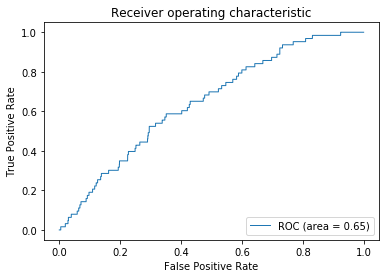

In [181]:
fpr, tpr, thresholds = roc_curve(y_valid, prob_result[2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [182]:
feature_importance = clfs_fited[2].feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

In [183]:
feature_importance[sorted_idx]

array([  0.86540784,   1.36405959,   3.60106437,  36.16672973,
        41.48565529,  42.91268212,  44.18637034,  47.03610935,
        49.52547725,  49.76925171,  50.27566981,  51.74650286,
        58.23816423,  60.53035875,  67.36258266,  98.85577994,
       100.        ])

In [184]:
features = [numerical_features1[ix] for ix in sorted_idx]
bardata = {"name":features[::-1], "importance percent":feature_importance[sorted_idx][::-1]}

In [185]:
features

['is_Opioid_Prescriber',
 'OpiodPrescribedVsPrescriptions',
 'Spec_Weight',
 'claim_max-mean',
 'AverageRank',
 'total_claim_count_max',
 'total_claim_count_sum',
 'supply_max-mean',
 'total_drug_cost_mean',
 'total_day_supply_sum',
 'drug_max-mean',
 'total_claim_count_mean',
 'total_drug_cost_max',
 'total_drug_cost_sum',
 'total_day_supply_max',
 'total_day_supply_mean',
 'drug_sum']

In [186]:
bardata

{'name': ['drug_sum',
  'total_day_supply_mean',
  'total_day_supply_max',
  'total_drug_cost_sum',
  'total_drug_cost_max',
  'total_claim_count_mean',
  'drug_max-mean',
  'total_day_supply_sum',
  'total_drug_cost_mean',
  'supply_max-mean',
  'total_claim_count_sum',
  'total_claim_count_max',
  'AverageRank',
  'claim_max-mean',
  'Spec_Weight',
  'OpiodPrescribedVsPrescriptions',
  'is_Opioid_Prescriber'],
 'importance percent': array([100.        ,  98.85577994,  67.36258266,  60.53035875,
         58.23816423,  51.74650286,  50.27566981,  49.76925171,
         49.52547725,  47.03610935,  44.18637034,  42.91268212,
         41.48565529,  36.16672973,   3.60106437,   1.36405959,
          0.86540784])}

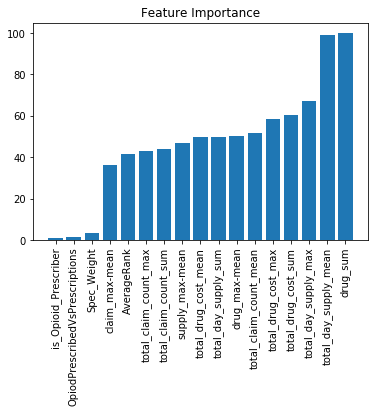

In [187]:
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), feature_importance[sorted_idx])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), features, rotation=90)

# Show plot
plt.show()